<h3 style='color:blue' align='center'>Customer Churn Prediction Using Artificial Neural Network (ANN)</h3>

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


**Load the data**

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5340,5341,15612667,Bird,680,Spain,Male,42,0,0.00,1,1,0,136377.21,0
2366,2367,15623430,Hill,672,France,Male,34,9,0.00,2,1,0,161800.77,0
1101,1102,15782219,Fanucci,703,Spain,Male,29,9,0.00,2,1,0,50679.48,0
315,316,15581539,Atkinson,474,Spain,Male,37,3,0.00,2,0,0,57175.32,0
9565,9566,15752294,Long,582,France,Female,38,9,135979.01,4,1,1,76582.95,1


**First of all, drop customerID column as it is of no use**

In [3]:
df.drop('CustomerId',axis='columns',inplace=True)
df.drop('Surname',axis='columns',inplace=True)
df.drop('RowNumber',axis='columns',inplace=True)


In [4]:
df.dtypes


CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.shape


(10000, 11)

In [6]:
df.isnull().sum()


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)


In [8]:
df['Geography'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
df['Geography'].replace({'France':1,'Spain':0,'Germany':2},inplace=True)


In [10]:
df.Gender.unique()


array([1, 0])

In [11]:
df.dtypes


CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
cols_to_scale = ['Balance','EstimatedSalary','CreditScore']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


**Train test split**

In [13]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)


**Build a model (ANN) in tensorflow/keras**

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [47]:

model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(10,),activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=500)


Epoch 1/500
250/250 [==============================] - 0s 612us/step - loss: 0.7136 - accuracy: 0.7847
Epoch 2/500
250/250 [==============================] - 0s 562us/step - loss: 0.4949 - accuracy: 0.7975
Epoch 3/500
250/250 [==============================] - 0s 570us/step - loss: 0.4724 - accuracy: 0.8014
Epoch 4/500
250/250 [==============================] - 0s 653us/step - loss: 0.4642 - accuracy: 0.8101
Epoch 5/500
250/250 [==============================] - 0s 814us/step - loss: 0.4571 - accuracy: 0.8125
Epoch 6/500
250/250 [==============================] - 0s 590us/step - loss: 0.4556 - accuracy: 0.8144
Epoch 7/500
250/250 [==============================] - 0s 566us/step - loss: 0.4524 - accuracy: 0.8123
Epoch 8/500
250/250 [==============================] - 0s 562us/step - loss: 0.4506 - accuracy: 0.8145
Epoch 9/500
250/250 [==============================] - 0s 583us/step - loss: 0.4485 - accuracy: 0.8141
Epoch 10/500
250/250 [==============================] - 0s 584us/step - l

In [48]:
model.evaluate(X_test, y_test)


63/63 [==============================] - 0s 585us/step - loss: 0.3559 - accuracy: 0.8520


[0.35592761635780334, 0.8519999980926514]

In [18]:
yp = model.predict(X_test)
yp[:5]


63/63 [==============================] - 0s 506us/step


array([[0.07944812],
       [0.08400207],
       [0.07122318],
       [0.06410734],
       [0.16106135]], dtype=float32)

In [49]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [48]:
y_pred[:10]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [49]:
y_test[:10]


7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [50]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1595
           1       0.73      0.11      0.19       405

    accuracy                           0.81      2000
   macro avg       0.77      0.55      0.54      2000
weighted avg       0.80      0.81      0.75      2000



Text(95.72222222222221, 0.5, 'Truth')

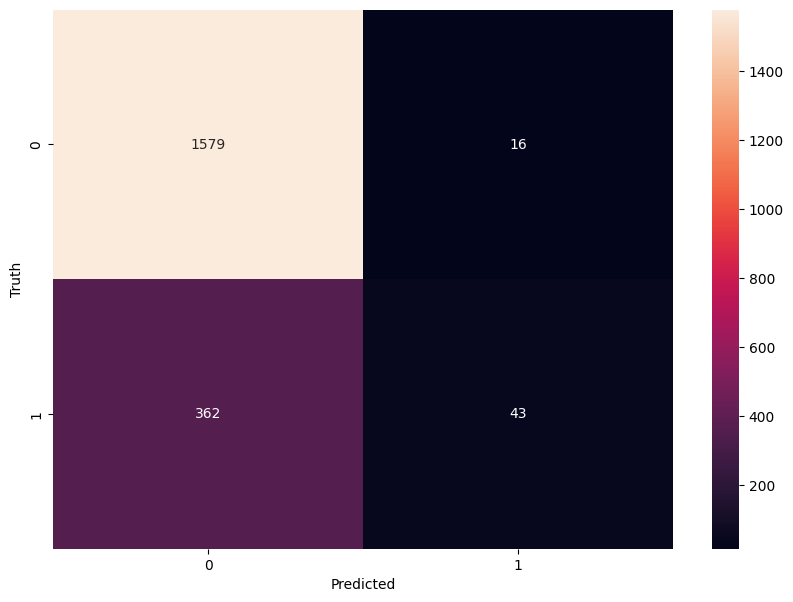

In [46]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [52]:
y_test.shape


(2000,)

In [43]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
print("Accuracy Score: ",acc)


Accuracy Score:  0.811


In [23]:
from sklearn.metrics import precision_score
ps = precision_score(y_test,y_pred)
print("Precision Score: ",ps)


Precision Score:  0.7288135593220338


In [26]:
from sklearn.metrics import recall_score
rs = recall_score(y_test,y_pred)
print("Recall Score: ",rs)


Recall Score:  0.10617283950617284


**Accuracy**

In [58]:
round((1556+92)/(1556+92+39+313),2)


0.82

**Precision for 0 class. i.e. Precision for customers who did not churn**

In [59]:
round(1556/(1556+313),2)


0.83

**Precision for 1 class. i.e. Precision for customers who actually churned**

In [242]:
round(92/(92+137),2)


0.63

**Recall for 0 class**

In [60]:
round(1556/(1556+39),2)


0.98